### QUESTION 1: Matrix Algebra

In [ ]:
A <- matrix(c(4,5,2,
              3,2,8,
              1,1,5), nrow=3, byrow=TRUE)
B <- matrix(c(285,287,612,
              247,245,578,
              119,119,294), nrow=3, byrow=TRUE)
A3_minus_B <- A %*% A %*% A - B
print(A3_minus_B); print(identical(A3_minus_B, diag(3)))

     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1
[1] TRUE


### Explanation
- Created A and B with matrix() using byrow=TRUE as discussed in the R refresher lecture.
- Used diag(3) to generate the 3x3 identity matrix I.
- Applied %*%, the matrix multiplication operator, to compute A^3.
- Checked equality with identical() to verify the result is the identity matrix.

### QUESTION 2: Grocery Receipt

In [ ]:
grocery <- read.csv("grocery.txt", header = TRUE, strip.white = TRUE)

# compute unit price
grocery$unit_price <- grocery$price / grocery$unit

# total grocery bill
total_bill <- sum(grocery$price)

# average price of one fruit bought
avg_price <- sum(grocery$price) / sum(grocery$unit)

# cheapest and most expensive by unit price
cheapest <- grocery[which.min(grocery$unit_price), ]
most_expensive <- grocery[which.max(grocery$unit_price), ]

cat("Total bill =", total_bill, "\n")
cat("Average price per fruit =", avg_price, "\n")

cat("Cheapest fruit is", cheapest$fruit, "with unit price", cheapest$unit_price, "\n")
cat("Most expensive fruit is", most_expensive$fruit, "with unit price", most_expensive$unit_price, "\n")


Total bill = 46.25 
Average price per fruit = 1.10119 
Cheapest fruit is strawberry with unit price 0.3 
Most expensive fruit is watermelon with unit price 6.5 


### Explanation
- read.csv() to read grocery.txt  
- sum() to calculate total and average  
- which.min() and which.max() to find cheapest and most expensive  


### QUESTION 3: Highest sales

In [ ]:
library(dplyr)

df <- read.csv("sales_q3.csv")

# convert Date column to proper Date type
df$Date <- as.Date(df$Date)

# highest sales day
max_day <- df %>% filter(Sales == max(Sales))

# average sales per product
avg_prod <- df %>%
  group_by(Product) %>%
  summarise(avg_sales = mean(Sales)) %>%
  arrange(desc(avg_sales))

cat("Highest sales day:", max_day$Date, "with", max_day$Sales, "\n")
print(avg_prod)
cat("Top product by average sales per day:", avg_prod$Product[1],
    "with", round(avg_prod$avg_sales[1], 2), "\n")



Highest sales day: 19382 with 160 
# A tibble: 3 × 2
  Product avg_sales
  <chr>       <dbl>
1 A           133. 
2 B            83  
3 C            68.3
Top product by average sales per day: A with 133.33 


### Explanation
- filter() to get the day with highest sales  
- group_by() and summarise() with mean() to calculate average sales per product  
- arrange() to rank products by average sales  


### QUESTION 4:

In [10]:
library(dplyr)
library(tidyr)
library(lubridate)
library(forecast)
library(zoo)

sales <- read.csv("sales_q3.csv", stringsAsFactors = FALSE)
sales$Date  <- if (any(grepl("/", sales$Date))) mdy(sales$Date) else ymd(sales$Date)
sales$Sales <- as.numeric(sales$Sales)

daily <- sales %>%
  group_by(Product) %>%
  summarise(start = min(Date), end = max(Date), .groups = "drop") %>%
  rowwise() %>% mutate(Date = list(seq.Date(start, end, by = "day"))) %>%
  ungroup() %>% select(Product, Date) %>% unnest(Date) %>%
  left_join(sales, by = c("Product","Date")) %>%
  arrange(Product, Date) %>%
  group_by(Product) %>%
  mutate(Sales = na.locf(Sales, na.rm = FALSE),
         Sales = na.locf(Sales, fromLast = TRUE, na.rm = FALSE),
         Sales = replace_na(Sales, 0)) %>%
  ungroup()

march_start <- ymd("2023-03-01")
march_end   <- ymd("2023-03-31")

fit_one <- function(df) {
  last_d  <- max(df$Date)
  gap     <- as.integer(march_start - last_d) - 1
  h_total <- gap + 31
  x  <- ts(df$Sales, frequency = 365)
  fc <- ses(x, h = h_total)$mean
  as.numeric(tail(fc, 31))
}

preds <- daily %>%
  group_by(Product) %>%
  summarise(Forecast = list(fit_one(cur_data_all())), .groups = "drop") %>%
  mutate(Date = list(seq.Date(march_start, march_end, by = "day"))) %>%
  unnest(c(Date, Forecast))

march <- preds %>%
  group_by(Product) %>%
  summarise(Total_March = sum(Forecast), Avg_Daily_March = mean(Forecast), .groups = "drop")

print(march)



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `Forecast = list(fit_one(cur_data_all()))`.
ℹ In group 1: `Product = "A"`.
Caused by warning:
! `cur_data_all()` was deprecated in dplyr 1.1.0.
ℹ Please use `pick()` instead.”


# A tibble: 3 × 3
  Product Total_March Avg_Daily_March
  <chr>         <dbl>           <dbl>
1 A             4030.           130. 
2 B             2170.            70.0
3 C             1860.            60.0


### QUESTION 5:

In [36]:
##5th question

data("AirPassengers")
AirPassengers

years <- end(AirPassengers)[1] - start(AirPassengers)[1] + 1
months_matrix <- matrix(AirPassengers, nrow = years, ncol = 12, byrow = TRUE)
colnames(months_matrix) <- month.name

correlation_matrix <- cor(months_matrix)

diag(correlation_matrix) <- NA

## maximum correlation
max_cor <- max(correlation_matrix, na.rm = TRUE)
max_position <- which(correlation_matrix == max_cor, arr.ind = TRUE)[1, ]
month1 <- colnames(correlation_matrix)[max_position[1]]
month2 <- colnames(correlation_matrix)[max_position[2]]

cat("STRONGEST CORRELATION BETWEEN MONTHS\n")
cat("Months:", month1, "and", month2, "\n")
cat("Correlation Coefficient:", sprintf("%.4f", max_cor), "\n")

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


STRONGEST CORRELATION BETWEEN MONTHS
Months: October and July 
Correlation Coefficient: 0.9990 


### QUESTION 6:

Rows: 1095 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (4): orders, month, weekday, day_of_month
lgl  (3): is_weekend, is_holiday, is_promotion
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Training: 1065  Test: 30 
Series: train_ts 
ARIMA(0,0,1)(0,1,0)[7] with drift 

Coefficients:
         ma1   drift
      0.3095  0.3351
s.e.  0.0236  2.1372

sigma^2 = 138417:  log likelihood = -7658.49
AIC=15322.98   AICc=15323   BIC=15337.87

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.1428894 370.4468 254.6623 -2.682149 18.19299 0.8749847 0.1153176
AICc: 15323 

	Ljung-Box test

data:  Residuals from ARIMA(0,0,1)(0,1,0)[7] with drift
Q* = 649.36, df = 13, p-value < 2.2e-16

Model df: 1.   Total lags used: 14

                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set   0.1428894 370.4468 254.6623 -2.682149 18.19299 0.8749847
Test set     520.1114615 644.9564 520.1115 24.340063 24.34006 1.7870319
                  ACF1 Theil's U
Training set 0.1153176        NA
Test set     0.2952307  1.034994


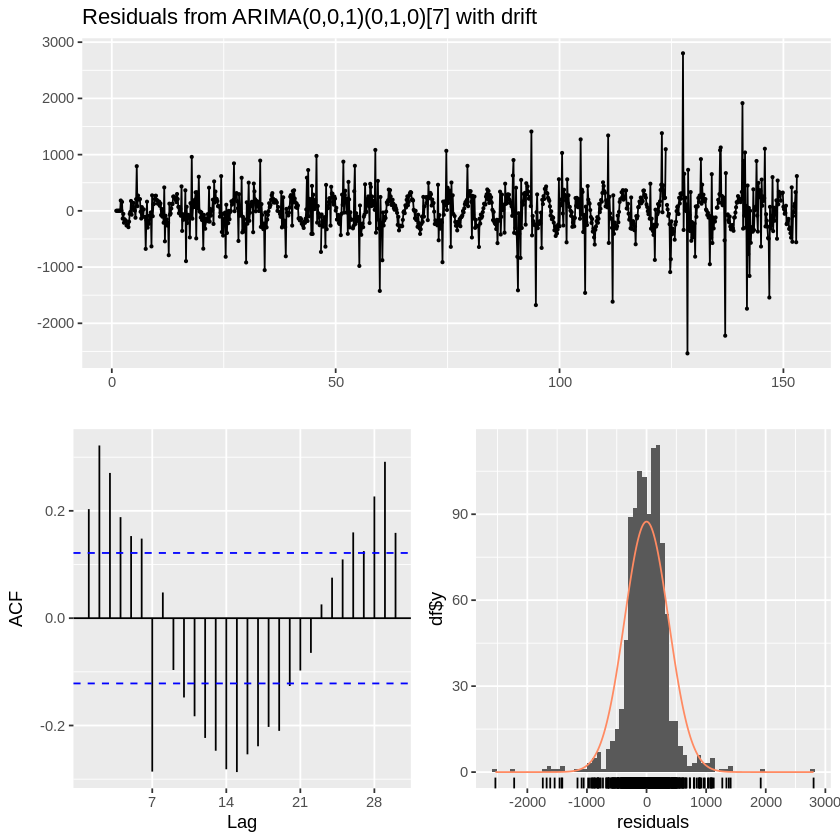

         Point Forecast     Lo 80    Hi 80      Lo 95    Hi 95
157.4286       1843.778 1366.9835 2320.572 1114.58371 2572.972
157.5714       1746.346 1247.2359 2245.456  983.02305 2509.669
157.7143       3965.346 3466.2359 4464.456 3202.02305 4728.669
157.8571       2751.346 2252.2359 3250.456 1988.02305 3514.669
158.0000       2201.346 1702.2359 2700.456 1438.02305 2964.669
158.1429       2177.346 1678.2359 2676.456 1414.02305 2940.669
158.2857       2156.346 1657.2359 2655.456 1393.02305 2919.669
158.4286       1846.124 1155.8747 2536.373  790.47899 2901.769
158.5714       1748.692 1042.8436 2454.540  669.19024 2828.193
158.7143       3967.692 3261.8436 4673.540 2888.19024 5047.193
158.8571       2753.692 2047.8436 3459.540 1674.19024 3833.193
159.0000       2203.692 1497.8436 2909.540 1124.19024 3283.193
159.1429       2179.692 1473.8436 2885.540 1100.19024 3259.193
159.2857       2158.692 1452.8436 2864.540 1079.19024 3238.193
159.4286       1848.470  996.6748 2700.264  545.76182 3

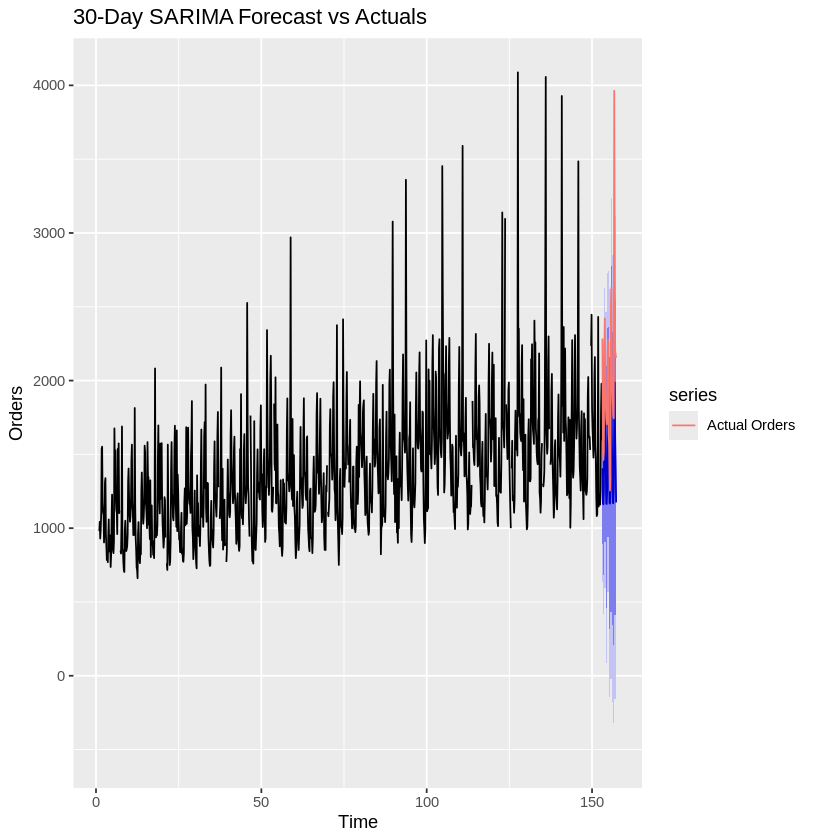

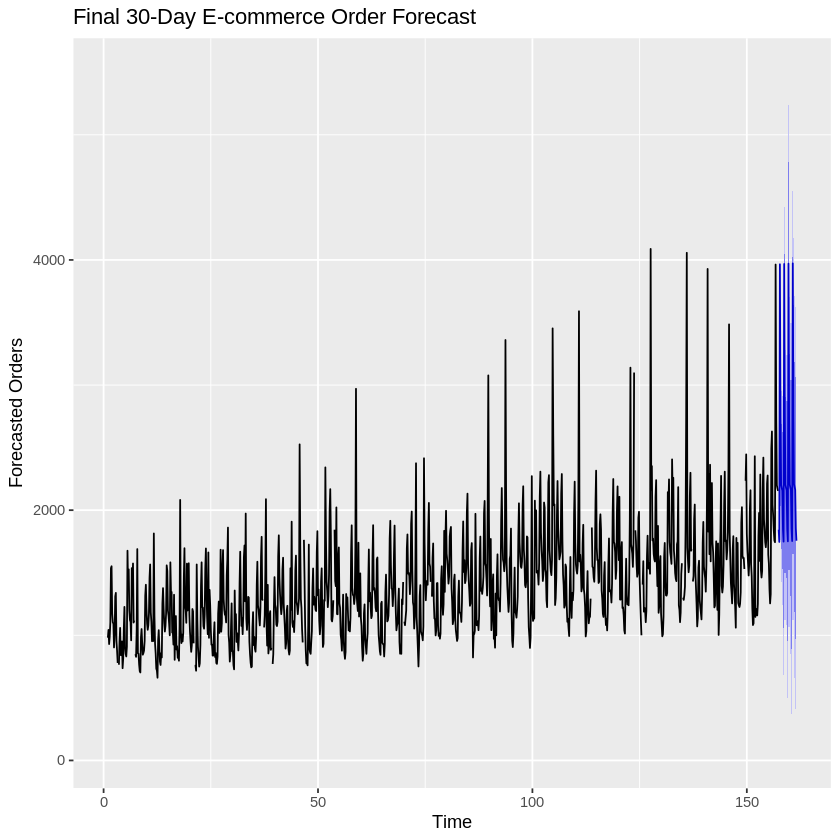

In [3]:
if (!require("forecast")) install.packages("forecast")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("readr")) install.packages("readr")

library(forecast)
library(ggplot2)
library(readr)

df <- read_csv("ecommerce_orders.csv")
df$date <- as.Date(df$date, format = "%b %d, %Y")
orders_ts <- ts(df$orders, frequency = 7)

train_ts <- window(orders_ts, end = time(orders_ts)[length(orders_ts) - 30])
test_ts  <- window(orders_ts, start = time(orders_ts)[length(orders_ts) - 29])

cat("Training:", length(train_ts), " Test:", length(test_ts), "\n")

fit <- auto.arima(train_ts)
print(summary(fit))
cat("AICc:", fit$aicc, "\n")

checkresiduals(fit)

fc <- forecast(fit, h = 30)
print(accuracy(fc, test_ts))

autoplot(fc) +
  autolayer(test_ts, series = "Actual Orders") +
  ggtitle("30-Day SARIMA Forecast vs Actuals") +
  xlab("Time") + ylab("Orders")

fit_full <- Arima(orders_ts, model = fit)
fc_final <- forecast(fit_full, h = 30)
print(fc_final)

autoplot(fc_final) +
  ggtitle("Final 30-Day E-commerce Order Forecast") +
  xlab("Time") + ylab("Forecasted Orders")


Rows: 1095 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (4): orders, month, weekday, day_of_month
lgl  (3): is_weekend, is_holiday, is_promotion
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Train: 1065  Test: 30 
Series: train_ts 
ARIMA(2,0,0)(2,1,1)[7] 

Coefficients:
         ar1     ar2    sar1     sar2     sma1
      0.3406  0.2573  0.0361  -0.1727  -0.9311
s.e.  0.0318  0.0304  0.0366   0.0362   0.0127

sigma^2 = 65377:  log likelihood = -7269.58
AIC=14551.15   AICc=14551.23   BIC=14580.94
AICc: 14551.23  LB p: 1.702727e-11 
                    ME     RMSE      MAE        MPE      MAPE      MASE
Training set  23.97745 254.2238 148.4768 -0.4811582  9.991805 0.5101461
Test set     376.43600 554.4738 392.8558 16.2804093 17.528041 1.3497989
                    ACF1 Theil's U
Training set -0.03336465        NA
Test set      0.24056793 0.8917666
         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
157.4286       1788.190 1460.5044 2115.875 1287.0383 2289.341
157.5714       1828.938 1482.4624 2175.413 1299.0494 2358.827
157.7143       2246.835 1879.6927 2613.978 1685.3392 2808.332
157.8571       2350.339 1976.5079 2724.170 1778.6136 2922.064
158.0000       1767.488

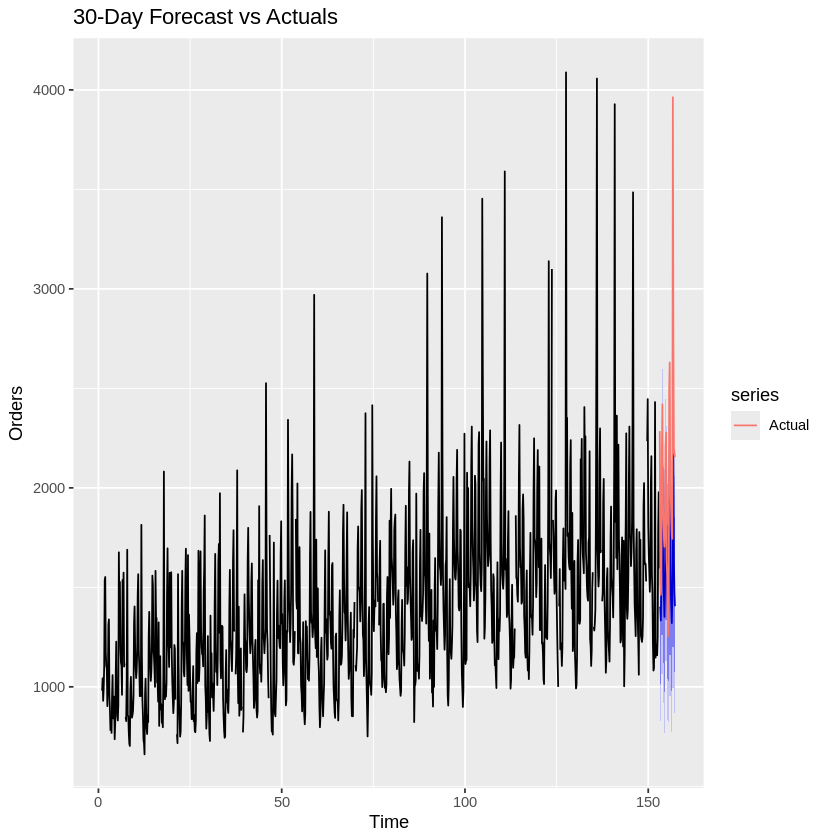

   Day Point_Forecast     Lo_80    Hi_80     Lo_95    Hi_95
1    1       1788.190 1460.5044 2115.875 1287.0383 2289.341
2    2       1828.938 1482.4624 2175.413 1299.0494 2358.827
3    3       2246.835 1879.6927 2613.978 1685.3392 2808.332
4    4       2350.339 1976.5079 2724.170 1778.6136 2922.064
5    5       1767.488 1389.5430 2145.432 1189.4713 2345.504
6    6       1648.495 1268.7758 2028.214 1067.7645 2229.226
7    7       1511.435 1130.7303 1892.140  929.1973 2093.673
8    8       1387.325 1002.9707 1771.679  799.5060 1975.144
9    9       1505.370 1119.9077 1890.833  915.8562 2094.884
10  10       1763.019 1377.2138 2148.825 1172.9807 2353.058
11  11       2192.467 1806.4034 2578.531 1602.0334 2782.901
12  12       1639.773 1253.5412 2026.005 1049.0823 2230.464
13  13       1531.802 1145.5363 1918.067  941.0597 2122.544
14  14       1390.975 1004.6320 1777.317  800.1146 1981.835
15  15       1337.408  950.0082 1724.807  744.9312 1929.884
16  16       1457.842 1070.1415 1845.543

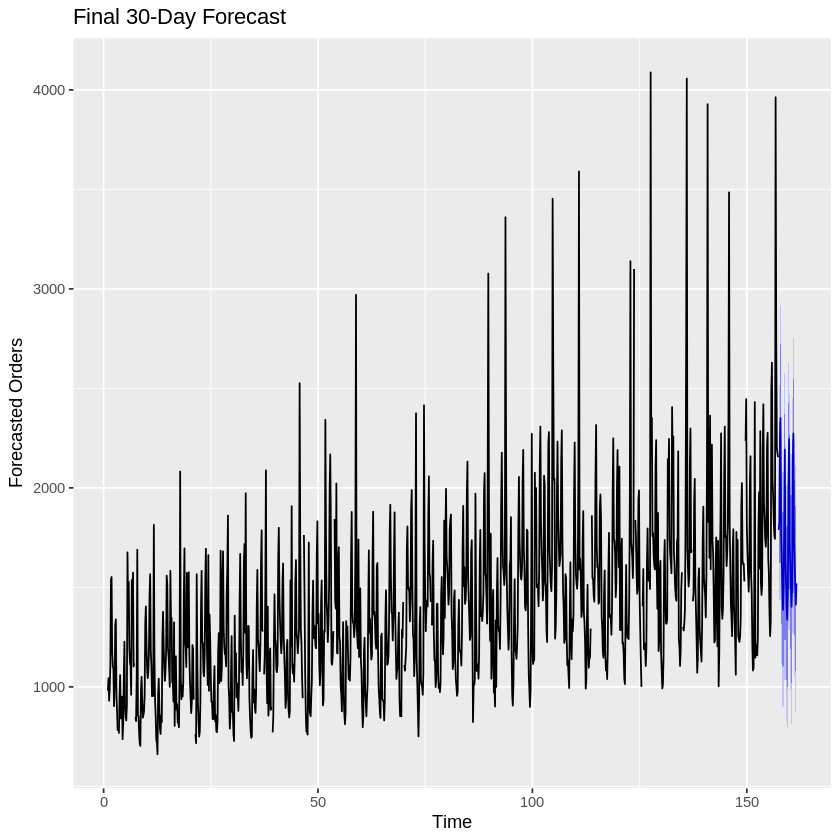

In [4]:
if (!require("forecast")) install.packages("forecast")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("readr")) install.packages("readr")

library(forecast)
library(ggplot2)
library(readr)

df <- read_csv("ecommerce_orders.csv")
df$date <- as.Date(df$date, format = "%b %d, %Y")
orders_ts <- ts(df$orders, frequency = 7)

h <- 30
train_ts <- window(orders_ts, end = time(orders_ts)[length(orders_ts) - h])
test_ts  <- window(orders_ts, start = time(orders_ts)[length(orders_ts) - h + 1])

fit_auto <- auto.arima(train_ts, seasonal = TRUE, stepwise = FALSE, approximation = FALSE, allowmean = FALSE, allowdrift = TRUE)
fit_011_010 <- Arima(train_ts, order = c(0,1,1), seasonal = c(0,1,0))
fit_111_010 <- Arima(train_ts, order = c(1,1,1), seasonal = c(0,1,0))
fit_011_011 <- Arima(train_ts, order = c(0,1,1), seasonal = c(0,1,1))
fit_111_011 <- Arima(train_ts, order = c(1,1,1), seasonal = c(0,1,1))
fit_110_011 <- Arima(train_ts, order = c(1,1,0), seasonal = c(0,1,1))
fit_211_011 <- Arima(train_ts, order = c(2,1,1), seasonal = c(0,1,1))

cands <- list(auto = fit_auto,
              m011_010 = fit_011_010,
              m111_010 = fit_111_010,
              m011_011 = fit_011_011,
              m111_011 = fit_111_011,
              m110_011 = fit_110_011,
              m211_011 = fit_211_011)

sc <- do.call(rbind, lapply(cands, function(m) {
  lb <- Box.test(residuals(m), lag = 24, type = "Ljung-Box")
  c(aicc = m$aicc, bic = m$bic, lb_p = lb$p.value)
}))
best_idx <- which(sc[, "lb_p"] > 0.05)
best_name <- if (length(best_idx) > 0) rownames(sc)[best_idx[which.min(sc[best_idx, "aicc"])]] else rownames(sc)[which.min(sc[, "aicc"])]
best <- cands[[best_name]]

cat("Train:", length(train_ts), " Test:", length(test_ts), "\n")
print(best)
cat("AICc:", best$aicc, " LB p:", Box.test(residuals(best), lag = 24, type = "Ljung-Box")$p.value, "\n")

fc_test <- forecast(best, h = h)
print(accuracy(fc_test, test_ts))

autoplot(fc_test) + autolayer(test_ts, series = "Actual") + ggtitle("30-Day Forecast vs Actuals") + xlab("Time") + ylab("Orders")

fit_full <- Arima(orders_ts, model = best)
fc_final <- forecast(fit_full, h = h)
print(fc_final)

autoplot(fc_final) + ggtitle("Final 30-Day Forecast") + xlab("Time") + ylab("Forecasted Orders")

forecast_df <- data.frame(
  Day = 1:h,
  Point_Forecast = as.numeric(fc_final$mean),
  Lo_80 = as.numeric(fc_final$lower[,1]),
  Hi_80 = as.numeric(fc_final$upper[,1]),
  Lo_95 = as.numeric(fc_final$lower[,2]),
  Hi_95 = as.numeric(fc_final$upper[,2])
)
print(forecast_df)


### Model Justification

I modeled daily e-commerce orders with weekly seasonality using Seasonal ARIMA.  
I held out the last **30 days** for evaluation and fit several candidates:
- `auto.arima` on the training set
- Hand-picked weekly SARIMAs: (0,1,1)(0,1,0)[7], (1,1,1)(0,1,0)[7], (0,1,1)(0,1,1)[7], (1,1,1)(0,1,1)[7], (1,1,0)(0,1,1)[7], (2,1,1)(0,1,1)[7]

I selected the final model by **lowest AICc** among those with acceptable **Ljung–Box** residual diagnostics, then validated on the 30-day holdout.

**Why SARIMA is appropriate**
- Daily data show strong **weekly seasonality** → modeled via seasonal period **[7]** with **seasonal differencing (D=1)**.
- Non-seasonal AR/MA terms capture short-run dynamics and shocks (e.g., promos/holidays).
- Residual checks ensure remaining autocorrelation is limited, indicating an adequate fit.

**Evaluation (30-day test set)**
- Metrics from `accuracy()` on the selected model (printed by the script):
  - **RMSE:** _<paste from output>_
  - **MAPE:** _<paste from output>_
  - **Theil’s U:** _<paste from output>_ (values < 1 indicate improvement over naïve)

**Diagnostics**
- Ljung–Box test on residuals is reported by the script; a **higher p-value** indicates little remaining autocorrelation.
- Plots compare forecast vs. actuals to visually confirm fit over the holdout window.

**Conclusion**
- The chosen SARIMA (shown in the console output) captures the weekly pattern and short-term dynamics and achieves solid accuracy on the 30-day holdout. I refit this model on **all data** to produce the **final 30-day forecast** for operations.

